In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [11]:
df_in = pd.read_csv('In_nofilter.txt')
df_in.columns = ['Index','Q_init','rms_time','rms_laser','Phase_gun','Amplitude_gun','Solenoid_T','Phase_b1','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']
df_in = df_in.drop(['Index'], axis=1)

df_in.tail(5)

,Q_init,rms_time,rms_laser,Phase_gun,Amplitude_gun,Solenoid_T,Phase_b1,Amplitude_b1,Phase_b2,Amplitude_b2,Phase_b3,Amplitude_b3
237894,0.001996,0.005409,0.5,7.276133,20.0,0.053870,-132.608564,0.374338,-27.831240,0.797090,38.048493,4.329127
237895,0.004421,0.007712,0.5,-6.357479,20.0,0.065710,-86.790588,3.381072,-24.759649,2.787824,-83.949531,4.549690
237896,0.004866,0.009276,0.5,-0.244844,20.0,0.057357,-143.675909,8.155687,-40.047743,7.424972,-170.455062,4.337159
237897,0.000837,0.004269,0.5,-2.987206,20.0,0.050680,-1.812179,9.714393,-9.426609,3.626437,63.386259,7.094827
237898,0.004107,0.001141,0.5,8.422578,20.0,0.061433,86.022024,8.408364,-47.298038,0.188964,38.983258,0.914422


In [12]:
df_out = pd.read_csv('Out_nofilter.txt')
df_out.columns = ['Index','Emittance_z','Bunch_length', 'Kinetic_energy', 'Energy_deviation','TOF','Trans_size','Trans_emittance','Q','Bunch_duration','ToF_Jitter','E_Jitter','Time_Resolution']
df_out = df_out.drop(['Index'], axis=1)

df_out.tail(5)

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q,Bunch_duration,ToF_Jitter,E_Jitter,Time_Resolution
237894,5.59750,3.21060,2.0360,22.414,26.265,0.36229,0.035683,-0.000014,1.092412e-11,2.366070e-13,0.028107,1.092668e-11
237895,5.62580,0.86508,1.9831,28.171,26.264,1.08090,0.073058,-0.000143,2.946097e-12,1.173419e-13,0.051468,2.948433e-12
237896,17.29600,6.40200,1.1087,28.015,26.692,0.87275,0.034984,-0.000040,2.248852e-11,5.205547e-13,0.042927,2.249454e-11
237897,0.97715,0.82826,3.4952,11.377,26.047,0.19849,0.041030,-0.000005,2.783604e-12,2.021283e-13,0.030103,2.790933e-12
237898,2.41690,4.61000,1.7564,35.325,26.305,0.20025,0.031864,-0.000033,1.577243e-11,6.499189e-13,0.070006,1.578582e-11


In [13]:
#print(df_in.loc[53585])
#print(df_out.loc[53585])

In [14]:
###Minimum locations: 18835[125fs], 21944[119fs], 37676[100fs]

df_out.sort_values(by=['Time_Resolution'])
#df_out.sort_values(by=['ToF_Jitter'])
#df_out.sort_values(by=['Bunch_duration'])


#df_out['Time_Resolution'].argmin()

,Emittance_z,Bunch_length,Kinetic_energy,Energy_deviation,TOF,Trans_size,Trans_emittance,Q,Bunch_duration,ToF_Jitter,E_Jitter,Time_Resolution
228724,2.618100e-01,0.020910,2.9846,12.600,26.098,3.07490,2.110900e-01,-0.000611,7.045689e-14,7.003648e-14,0.091648,9.934426e-14
55807,3.358000e-01,0.020877,2.6441,16.090,26.154,0.60950,5.387000e-02,-0.000006,7.052107e-14,8.424818e-14,0.030107,1.098680e-13
128767,2.893200e-01,0.022654,2.5283,13.226,26.138,0.49128,5.035400e-02,-0.000011,7.660381e-14,8.281556e-14,0.078013,1.128121e-13
115718,4.224000e-01,0.026014,3.2349,16.939,26.088,0.44920,4.715100e-02,-0.000010,8.753161e-14,7.386795e-14,0.087605,1.145350e-13
29864,4.546700e-01,0.024223,2.6123,18.777,26.154,0.89071,7.339100e-02,-0.000011,8.184619e-14,8.111089e-14,0.071702,1.152292e-13
...,...,...,...,...,...,...,...,...,...,...,...,...
221706,8.653400e+07,1180.400000,1.7078,73371.000,30.481,72.07500,8.026000e+06,-0.000396,4.043358e-09,NaN,-6.876937,NaN
226780,2.940300e+02,27.627000,1.1561,117.190,27.199,1.67200,2.456900e+00,-0.000018,9.674700e-11,NaN,NaN,NaN
227299,1.831100e+04,151.200000,1.1228,258.310,27.313,11.67700,2.108200e+01,-0.000173,5.306215e-10,NaN,NaN,NaN
228633,8.206300e+00,4.102700,1.0337,10.256,27.341,20.92000,1.781100e+01,-0.000070,1.449157e-11,NaN,NaN,NaN


In [15]:
hbar=6.62e-34/(2*np.pi)
m=9.1e-31
c=3e8
coeff = hbar/m/c
df_out['Lateral_coherence'] = coeff*df_out['Trans_size']*1e-3/(df_out['Trans_emittance']*1e-6)



#df_out.iloc[np.arange(df_out['Bunch_length'].argmax()-5,df_out['Bunch_length'].argmax()+5)]
df_in.iloc[70728]
#df_out.iloc[5196]

Q_init             0.004829
rms_time           0.006909
rms_laser          0.500000
Phase_gun          5.039420
Amplitude_gun     20.000000
Solenoid_T         0.059332
Phase_b1         -55.906094
Amplitude_b1       0.572360
Phase_b2         157.463238
Amplitude_b2       5.253892
Phase_b3          64.704326
Amplitude_b3       0.373273
Name: 70728, dtype: float64

In [16]:
df_in = df_in[df_out['Time_Resolution'].notna()]
df_out = df_out[df_out['Time_Resolution'].notna()]

df_out['Log_Bunch'] = np.log10(df_out['Bunch_duration']*1e15)
df_out['Log_Jitter'] = np.log10(df_out['ToF_Jitter']*1e15)
df_out['Log_Q'] = np.log10(-df_out['Q']*1e6)
df_out['Scaled_Emittance'] = np.log10(df_out['Trans_emittance']*1e3)
df_out['Q_scaled'] = -df_out['Q']*1e6


df_in_short = df_in[['Q_init','rms_time','Phase_gun','Phase_b1','Solenoid_T','Amplitude_b1','Phase_b2','Amplitude_b2','Phase_b3','Amplitude_b3']]
#df_out_short = df_out[['Log_TR']]#,'Q','Trans_emittance','Trans_size','Kinetic_energy']]
df_out_short = df_out[['Log_Bunch','Log_Jitter','Scaled_Emittance','Kinetic_energy','Log_Q']]


#df_out_short = df_out[['Log_bunch_length','Log_deviation']]
#df_out_short = df_out[['Log_bunch_length']]
#df_out_short = df_out[['Log_emittance', 'Log_bunch_length','Log_deviation']]




x_train, x_validate, x_test = np.split(df_in_short.sample(frac=1, random_state=42), [int(.7*len(df_in_short)), int(.9*len(df_in_short))])
#y_train, y_validate, y_test = np.split(df_out['Log_bunch_length'].sample(frac=1, random_state=42), [int(.7*len(df_out)), int(.9*len(df_out))])
y_train, y_validate, y_test = np.split(df_out_short.sample(frac=1, random_state=42), [int(.7*len(df_out_short)), int(.9*len(df_out_short))])




df_out_short.head(5)

,Log_Bunch,Log_Jitter,Scaled_Emittance,Kinetic_energy,Log_Q
0,3.588543,2.050304,1.679936,1.9136,1.265478
1,4.128846,2.829094,2.071330,1.0556,2.314106
2,3.693165,2.715224,1.655062,1.7218,1.438139
3,3.909638,2.885514,1.660657,2.2708,1.646007
4,3.077600,2.269852,1.603534,2.9455,1.204649


In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_validate = scaler.transform(x_validate)
x_test = scaler.transform(x_test)

scaler2 = StandardScaler()
scaler2.fit(y_train)
y_train = scaler2.transform(y_train)
y_validate = scaler2.transform(y_validate)
y_test = scaler2.transform(y_test)


In [19]:
import tensorflow_addons as tfa
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorboard.plugins.hparams import api as hp

#Create custom loss function that will put more weight into the deviations in small values of time resolution
#The intention is that the model learns to better fit the low time resolution values instead of large values
#in which the differences between prediction and true value are bigger by default. 
def my_loss_fn(y_true, y_pred):
    squared_dif = tf.square(y_true - y_pred)
    log_dif = tf.log(squared_dif)
    return tf.reduce_mean(1/tf.abs(log_dif), axis=-1)  # Note the `axis=-1`


#Define the simple model we will use for learning (still quite random)
def model_simple(n_inputs,n_outputs):
    model = keras.models.Sequential()
#    model.add(keras.layers.Dense(36112, input_dim = n_inputs, activation = 'relu'))
#    model.add(keras.layers.Dense(8020, activation = 'relu'))
    model.add(keras.layers.Dense(2002,input_dim = n_inputs, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(447, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(22, activation = 'relu'))
    #model.add(keras.layers.Dropout(.2))
    model.add(keras.layers.Dense(n_outputs))#, activation = 'linear'))
###    model.compile(optimizer='adam',loss=my_loss_fn, metrics=[tfa.metrics.r_square.RSquare(y_shape = (n_outputs,))])
    model.compile(loss='mse', optimizer='adam', metrics=[tfa.metrics.r_square.RSquare(y_shape = (n_outputs,))])
    return model


#TensorBoard creation
log_directory = 'logs/fit'
timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
log_directory = log_directory + '/' + timestamp

board = TensorBoard(log_dir = log_directory, histogram_freq=1,
                   write_graph = True,
                   write_images = True,
                   update_freq = 'epoch',
                   profile_batch = 2,
                   embeddings_freq = 1)

#Early stop creation to stop before overfitting
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1, patience=25)

2022-04-13 17:54:31.191038: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-04-13 17:54:31.191062: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-04-13 17:54:31.208277: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.


In [20]:
#a = my_loss_fn(np.array([3,3,2]),np.array([5,2,3]))
#print(a)

hist = {}
#Train the simple model and evaluate
model = model_simple(10,5)

hist['simple'] = model.fit(x_train, y_train, validation_data=(x_validate, y_validate),
                           epochs=1000,callbacks=[early_stop, board])

loss_train, train_rsquare = model.evaluate(x_train, y_train, verbose=0)
loss_validation, validation_rsquare = model.evaluate(x_validate, y_validate, verbose=0)
loss_test, test_rsquare = model.evaluate(x_test, y_test, verbose=0)

print('Train: %.4f, Test: %.4f' % (train_rsquare, test_rsquare))
model.save('model_5Out.h5')

2022-04-13 17:54:35.395846: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-13 17:54:35.395897: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (donna): /proc/driver/nvidia/version does not exist


Epoch 1/1000
  11/5202 [..............................] - ETA: 1:29 - loss: 0.7399 - r_square: 0.1910

2022-04-13 17:54:36.518578: I tensorflow/core/profiler/lib/profiler_session.cc:110] Profiler session initializing.
2022-04-13 17:54:36.518707: I tensorflow/core/profiler/lib/profiler_session.cc:125] Profiler session started.
2022-04-13 17:54:36.533288: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-04-13 17:54:36.538480: I tensorflow/core/profiler/lib/profiler_session.cc:143] Profiler session tear down.
2022-04-13 17:54:36.544246: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2022-04-13--1754/plugins/profile/2022_04_13_17_54_36

2022-04-13 17:54:36.545216: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/2022-04-13--1754/plugins/profile/2022_04_13_17_54_36/donna.trace.json.gz
2022-04-13 17:54:36.554061: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/2022-04-13--1754/plugins/profile/2022_04_13_1

5200/5202 [============================>.] - ETA: 0s - loss: 0.0979 - r_square: 0.9021

2022-04-13 17:55:35.760701: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 214774560 exceeds 10% of free system memory.


5202/5202 [==============================] - 61s 11ms/step - loss: 0.0979 - r_square: 0.9021 - val_loss: 0.0439 - val_r_square: 0.9563
Epoch 2/1000
5202/5202 [==============================] - ETA: 0s - loss: 0.0420 - r_square: 0.9580

2022-04-13 17:56:34.491932: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 214774560 exceeds 10% of free system memory.


5202/5202 [==============================] - 59s 11ms/step - loss: 0.0420 - r_square: 0.9580 - val_loss: 0.0352 - val_r_square: 0.9649
Epoch 3/1000
5200/5202 [============================>.] - ETA: 0s - loss: 0.0340 - r_square: 0.9660

2022-04-13 17:57:33.259065: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 214774560 exceeds 10% of free system memory.


5202/5202 [==============================] - 59s 11ms/step - loss: 0.0340 - r_square: 0.9660 - val_loss: 0.0256 - val_r_square: 0.9745
Epoch 4/1000
5200/5202 [============================>.] - ETA: 0s - loss: 0.0292 - r_square: 0.9708

2022-04-13 17:58:32.024387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 214774560 exceeds 10% of free system memory.


5202/5202 [==============================] - 59s 11ms/step - loss: 0.0292 - r_square: 0.9708 - val_loss: 0.0610 - val_r_square: 0.9390
Epoch 5/1000
5202/5202 [==============================] - ETA: 0s - loss: 0.0259 - r_square: 0.9741

2022-04-13 17:59:30.737252: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 214774560 exceeds 10% of free system memory.


5202/5202 [==============================] - 59s 11ms/step - loss: 0.0259 - r_square: 0.9741 - val_loss: 0.0200 - val_r_square: 0.9800
Epoch 6/1000
5202/5202 [==============================] - 64s 12ms/step - loss: 0.0244 - r_square: 0.9756 - val_loss: 0.0293 - val_r_square: 0.9708
Epoch 7/1000
5202/5202 [==============================] - 69s 13ms/step - loss: 0.0234 - r_square: 0.9766 - val_loss: 0.0273 - val_r_square: 0.9728
Epoch 8/1000
5202/5202 [==============================] - 75s 14ms/step - loss: 0.0214 - r_square: 0.9786 - val_loss: 0.0182 - val_r_square: 0.9818
Epoch 9/1000
5202/5202 [==============================] - 66s 13ms/step - loss: 0.0183 - r_square: 0.9817 - val_loss: 0.0175 - val_r_square: 0.9826
Epoch 10/1000
5202/5202 [==============================] - 61s 12ms/step - loss: 0.0191 - r_square: 0.9809 - val_loss: 0.0148 - val_r_square: 0.9853
Epoch 11/1000
5202/5202 [==============================] - 60s 12ms/step - loss: 0.0165 - r_square: 0.9835 - val_loss: 0.017

5202/5202 [==============================] - 54s 10ms/step - loss: 0.0068 - r_square: 0.9932 - val_loss: 0.0081 - val_r_square: 0.9920
Epoch 61/1000
5202/5202 [==============================] - 55s 11ms/step - loss: 0.0077 - r_square: 0.9923 - val_loss: 0.0083 - val_r_square: 0.9917
Epoch 62/1000
5202/5202 [==============================] - 59s 11ms/step - loss: 0.0074 - r_square: 0.9926 - val_loss: 0.0080 - val_r_square: 0.9920
Epoch 63/1000
5202/5202 [==============================] - 56s 11ms/step - loss: 0.0071 - r_square: 0.9929 - val_loss: 0.0084 - val_r_square: 0.9917
Epoch 64/1000
5202/5202 [==============================] - 57s 11ms/step - loss: 0.0069 - r_square: 0.9931 - val_loss: 0.0081 - val_r_square: 0.9920
Epoch 65/1000
5202/5202 [==============================] - 55s 11ms/step - loss: 0.0076 - r_square: 0.9924 - val_loss: 0.0080 - val_r_square: 0.9920
Epoch 66/1000
5202/5202 [==============================] - 58s 11ms/step - loss: 0.0073 - r_square: 0.9927 - val_loss: 0

Epoch 115/1000
5202/5202 [==============================] - 60s 12ms/step - loss: 0.0059 - r_square: 0.9941 - val_loss: 0.0077 - val_r_square: 0.9924
Epoch 116/1000
5202/5202 [==============================] - 61s 12ms/step - loss: 0.0058 - r_square: 0.9942 - val_loss: 0.0069 - val_r_square: 0.9932
Epoch 117/1000
5202/5202 [==============================] - 70s 14ms/step - loss: 0.0053 - r_square: 0.9947 - val_loss: 0.0082 - val_r_square: 0.9918
Epoch 118/1000
5202/5202 [==============================] - 69s 13ms/step - loss: 0.0058 - r_square: 0.9942 - val_loss: 0.0077 - val_r_square: 0.9924
Epoch 119/1000
5202/5202 [==============================] - 66s 13ms/step - loss: 0.0059 - r_square: 0.9941 - val_loss: 0.0067 - val_r_square: 0.9933
Epoch 120/1000
5202/5202 [==============================] - 78s 15ms/step - loss: 0.0054 - r_square: 0.9946 - val_loss: 0.0081 - val_r_square: 0.9920
Epoch 121/1000
5202/5202 [==============================] - 76s 15ms/step - loss: 0.0051 - r_square:

2022-04-14 14:56:12.222904: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_5Out/assets


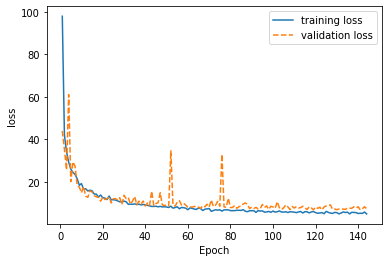

In [21]:
def create_plot(ax, hist_output, scale=1, prefix=None, same_colour=False):
    loss = hist_output.history['loss']
    val_loss = hist_output.history['val_loss']
    loss = np.asarray(loss)
#    loss = loss/loss.max()
    val_loss = np.asarray(val_loss)
#    val_loss = val_loss/val_loss.max()

    epoch = np.arange(1, len(loss) +1)
    
    label = 'training loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
    line, = ax.plot(epoch, loss * scale, '-', label=label)
    
    label = 'validation loss'
    if prefix is not None: label = '{}: {}'.format(prefix, label)
        
    kws = {}
    if same_colour:
        colour = line.get_color()
        kws.setdefault('color', colour)
    ax.plot(epoch, val_loss * scale, '--', label=label, **kws)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss')
    ax.legend(loc=0)

fig, ax = plt.subplots(1, 1)
create_plot(ax, hist['simple'], scale=1000)

model.save('model_5Out')

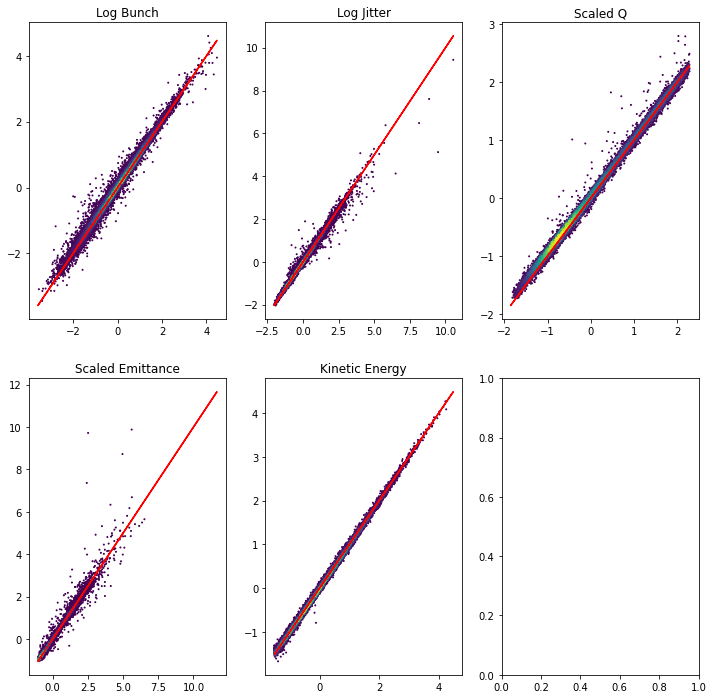

In [14]:
from scipy.stats import gaussian_kde

#Quite decent result with 2002, 447, 100, 22 -> 4

y_test_bunch_length = np.asarray(y_test[:,0][:20000])
calculated_bunch_length = model.predict(x_test)[:20000,0]
xy0 = np.vstack([y_test_bunch_length, calculated_bunch_length])
z0 = gaussian_kde(xy0)(xy0)

y_test_jitter = np.asarray(y_test[:,1][:20000])
calculated_jitter  = model.predict(x_test)[:20000,1]
xy3 = np.vstack([y_test_jitter , calculated_jitter])
z3 = gaussian_kde(xy3)(xy3)

y_test_emittance = np.asarray(y_test[:,2][:20000])
calculated_emittance = model.predict(x_test)[:20000,2]
xy1 = np.vstack([y_test_emittance, calculated_emittance])
z1 = gaussian_kde(xy1)(xy1)

y_test_energy = np.asarray(y_test[:,3][:20000])
calculated_energy = model.predict(x_test)[:20000,3]
xy2 = np.vstack([y_test_energy, calculated_energy])
z2 = gaussian_kde(xy2)(xy2)

y_test_Q = np.asarray(y_test[:,4][:20000])
calculated_Q = model.predict(x_test)[:20000,4]
xy4 = np.vstack([y_test_Q, calculated_Q])
z4 = gaussian_kde(xy4)(xy4)

#df_out_short = df_out[['Log_Bunch','Log_Jitter','Scaled_Emittance','Kinetic_energy','Log_Q']]

#plt.scatter(y_test['Log_bunch_length'],model.predict(x_test)[:,3:])
fig,axs = plt.subplots(2,3,figsize=(12,12))

axs[0,0].set_title('Log Bunch')
axs[0,0].scatter(y_test_bunch_length,calculated_bunch_length,c=z0,s=1)
axs[0,0].plot(y_test[:,0],y_test[:,0],'r')

axs[0,1].set_title('Log Jitter')
axs[0,1].scatter(y_test_jitter,calculated_jitter,c=z3,s=1)
axs[0,1].plot(y_test[:,1],y_test[:,1],'r')

axs[1,0].set_title('Scaled Emittance')
axs[1,0].scatter(y_test_emittance,calculated_emittance,c=z1,s=1)
axs[1,0].plot(y_test[:,2],y_test[:,2],'r')

axs[1,1].set_title('Kinetic Energy')
axs[1,1].scatter(y_test_energy,calculated_energy,c=z2,s=1)
axs[1,1].plot(y_test[:,3],y_test[:,3],'r')

axs[0,2].set_title('Scaled Q')
axs[0,2].scatter(y_test_Q,calculated_Q,c=z4,s=1)
axs[0,2].plot(y_test[:,4],y_test[:,4],'r')

fig.savefig('5out_model.png')
plt.show()
